# Pandas

Pandas es una librería de Python que nos va a permitir trabajar con grandes cantidades de datos fácilmente.

Por ejemplo, nos permite leer ficheros de Excel, ficheros CSV, u otros formatos.

En esta sesión usaremos la función `pd.read_csv()` para leer ficheros de valores separados por coma (CSV).

Pandas propone fundamnetalmente dos interfaces para operar con los datos:

- DataFrames ([`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html))
- Series ([`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html))

In [1]:
import pandas as pd

Usaremos de nuevo los datos de producto interior bruto suministrados por la Reserva Federal de San Luis ([GDP](https://fred.stlouisfed.org/series/GDP)).

En este caso tendremos los datos trimestrales de producto interior bruto, ajustados estacionalmente, en miles de millones de dólares estadounidenses.

Para ello, descargamos los datos y los ponemos en la carpeta `data`, renombrando el archivo a `gdp.csv`.

In [2]:
df = pd.read_csv('data/gdp.csv', index_col='observation_date', date_format="%Y-%m")
df

,GDP
observation_date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2024-04-01,29016.714
2024-07-01,29374.914
2024-10-01,29723.864


## Operaciones básicas

In [3]:
df.head()

,GDP
observation_date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [4]:
df.tail(10)

,GDP
observation_date,
2023-01-01,27164.359
2023-04-01,27453.815
2023-07-01,27967.697
2023-10-01,28296.967
2024-01-01,28624.069
2024-04-01,29016.714
2024-07-01,29374.914
2024-10-01,29723.864
2025-01-01,29962.047


In [5]:
df.describe()

,GDP
count,314.000000
mean,7596.130732
std,7960.530087
min,243.164000
25%,823.054000
50%,4526.617000
75%,13278.813500
max,30353.902000


Para acceder a una cierta columna, se usan los corchetes y se devuelve un objeto `pandas.Series`.

In [6]:
df['GDP']

observation_date
1947-01-01      243.164
1947-04-01      245.968
1947-07-01      249.585
1947-10-01      259.745
1948-01-01      265.742
                ...    
2024-04-01    29016.714
2024-07-01    29374.914
2024-10-01    29723.864
2025-01-01    29962.047
2025-04-01    30353.902
Name: GDP, Length: 314, dtype: float64

Para acceder a varias columnas se introduce una lista entre corchetes y se devuelve un objeto `pd.DataFrame`:

In [7]:
df[['GDP']]

,GDP
observation_date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2024-04-01,29016.714
2024-07-01,29374.914
2024-10-01,29723.864


## Graficado y funciones útiles

In [8]:
# Calcular diferencia con el trimestre anterior [en millardos de USD]
df['GDP'].diff()

observation_date
1947-01-01        NaN
1947-04-01      2.804
1947-07-01      3.617
1947-10-01     10.160
1948-01-01      5.997
               ...   
2024-04-01    392.645
2024-07-01    358.200
2024-10-01    348.950
2025-01-01    238.183
2025-04-01    391.855
Name: GDP, Length: 314, dtype: float64

<Axes: xlabel='Fecha', ylabel='Diferencia trimestral [millardos USD]'>

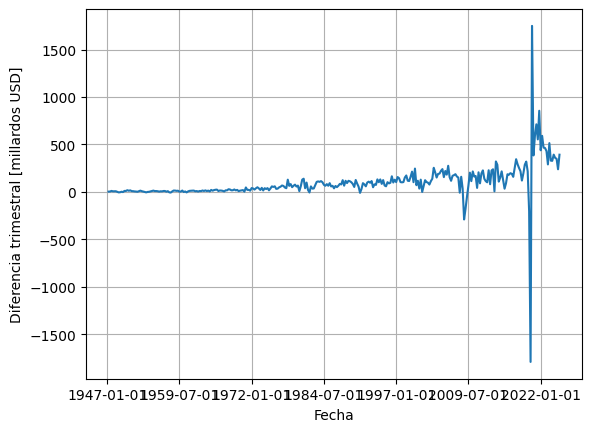

In [9]:
df['GDP'].diff().plot(xlabel='Fecha', ylabel='Diferencia trimestral [millardos USD]', grid=True)

<Axes: xlabel='Fecha', ylabel='Diferencia  anual por trimestre [millardos USD]'>

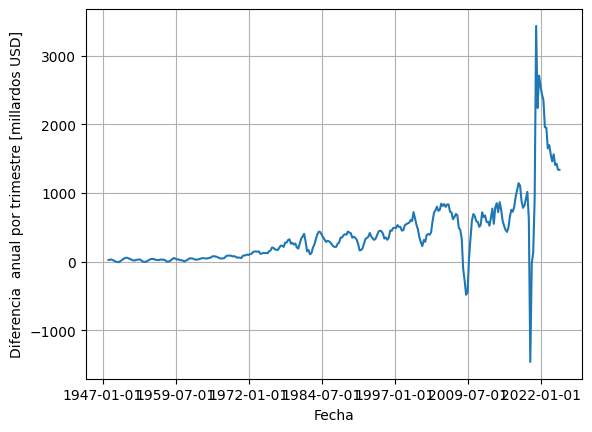

In [10]:
df['GDP'].diff(4).plot(xlabel='Fecha', ylabel='Diferencia  anual por trimestre [millardos USD]', grid=True)

<Axes: title={'center': 'GDP'}, xlabel='observation_date'>

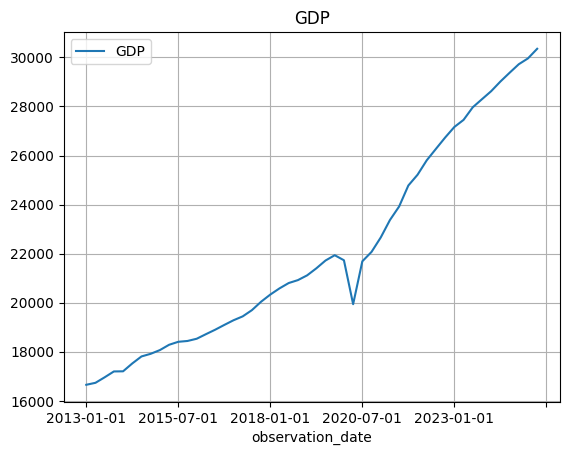

In [11]:
df.tail(50).plot(title='GDP', grid=True)

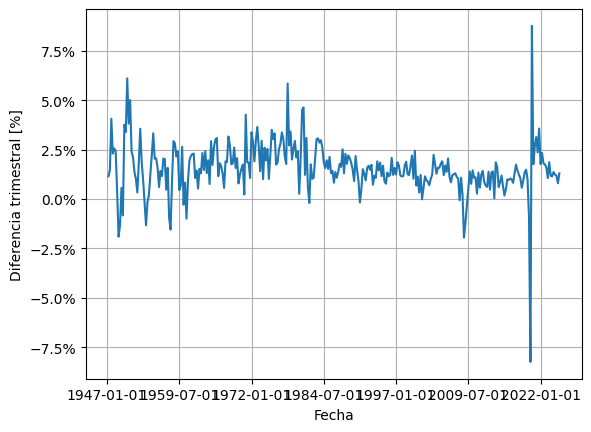

In [12]:
import matplotlib.ticker as mtick

ax = df['GDP'].pct_change().plot(xlabel='Fecha', ylabel='Diferencia trimestral [%]', grid=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

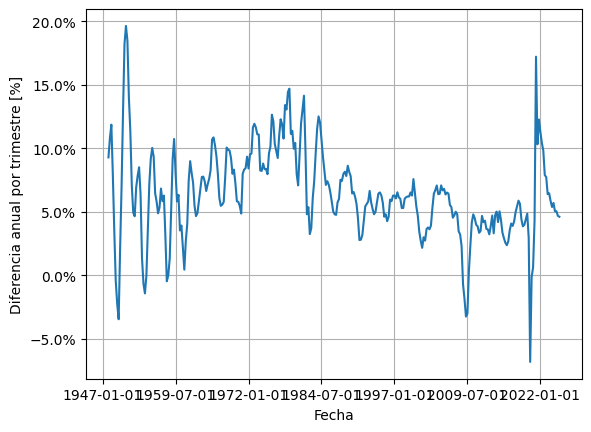

In [13]:
ax = df['GDP'].pct_change(4).plot(xlabel='Fecha', ylabel='Diferencia anual por trimestre [%]', grid=True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

## Otros datos

También podemos usar estructuras de datos más complejas. Por ejemplo, el PIB per cápita para diferentes países, tal y como lo suministra la OCDE en el portal [OECD Data explorer](https://data-explorer.oecd.org/vis?lc=en&tm=DF_TABLE1_EXPENDITURE_HCPC&pg=0&snb=1&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_NAMAIN10%40DF_TABLE1_EXPENDITURE_HCPC&df[ag]=OECD.SDD.NAD&df[vs]=&pd=%2C&dq=A.AUS%2BAUT%2BBEL%2BCAN%2BCHL%2BCOL%2BCRI%2BCZE%2BDNK%2BEST%2BFIN%2BFRA%2BDEU%2BGRC%2BHUN%2BISL%2BIRL%2BISR%2BITA%2BJPN%2BKOR%2BLVA%2BLTU%2BLUX%2BMEX%2BNLD%2BNZL%2BNOR%2BPOL%2BPRT%2BSVK%2BSVN%2BESP%2BSWE%2BCHE%2BTUR%2BGBR%2BUSA...B1GQ_POP.......&to[TIME_PERIOD]=false&vw=tb)

In [14]:
df = pd.read_csv('data/gdp-paises.csv')
df

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,FREQ,Unnamed: 5,REF_AREA,Unnamed: 7,SECTOR,Unnamed: 9,...,CONF_STATUS,Unnamed: 35,DECIMALS,Unnamed: 37,OBS_STATUS,Unnamed: 39,UNIT_MULT,Unnamed: 41,CURRENCY,Unnamed: 43
0,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,NaN,I,A,NaN,ISL,NaN,S1,NaN,...,F,NaN,1,NaN,P,NaN,0,NaN,_Z,NaN
1,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,NaN,I,A,NaN,ISL,NaN,S1,NaN,...,F,NaN,1,NaN,P,NaN,0,NaN,_Z,NaN
2,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,NaN,I,A,NaN,AUS,NaN,S1,NaN,...,F,NaN,1,NaN,A,NaN,0,NaN,_Z,NaN
3,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,NaN,I,A,NaN,GBR,NaN,S1,NaN,...,F,NaN,1,NaN,A,NaN,0,NaN,_Z,NaN
4,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,NaN,I,A,NaN,NLD,NaN,S1,NaN,...,F,NaN,1,NaN,P,NaN,0,NaN,_Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,NaN,I,A,NaN,ISL,NaN,S1,NaN,...,F,NaN,1,NaN,P,NaN,0,NaN,_Z,NaN
1863,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,NaN,I,A,NaN,ISL,NaN,S1,NaN,...,F,NaN,1,NaN,P,NaN,0,NaN,_Z,NaN
1864,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,NaN,I,A,NaN,ISL,NaN,S1,NaN,...,F,NaN,1,NaN,P,NaN,0,NaN,_Z,NaN
1865,DATAFLOW,OECD.SDD.NAD:DSD_NAMAIN10@DF_TABLE1_EXPENDITUR...,NaN,I,A,NaN,ISL,NaN,S1,NaN,...,F,NaN,1,NaN,P,NaN,0,NaN,_Z,NaN


In [15]:
# Filtramos sólo la información que nos interesa
df = df[['OBS_VALUE', 'REF_AREA', 'TIME_PERIOD']]

<Axes: xlabel='TIME_PERIOD', ylabel='PIB per capita precios corr. [USD]'>

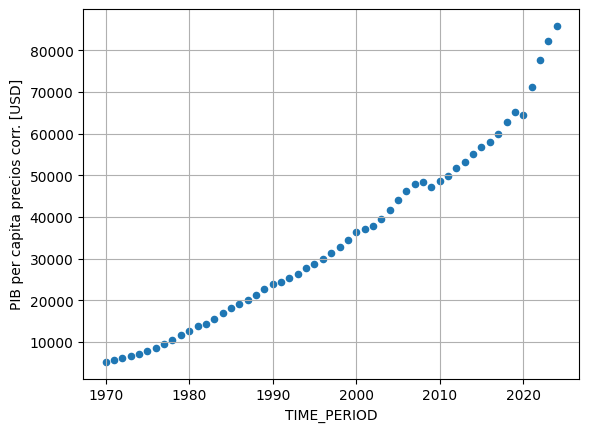

In [16]:
# Representamos el PIB per cápita de Estados Unidos
df[df['REF_AREA']=='USA'].plot.scatter(x='TIME_PERIOD', y='OBS_VALUE', ylabel='PIB per capita precios corr. [USD]', grid=True)

In [17]:
# Podemos ver qué países hay en los datos viendo los valores únicos de la columna `REF_AREA`
df['REF_AREA'].unique()

array(['ISL', 'AUS', 'GBR', 'NLD', 'PRT', 'DNK', 'CAN', 'FIN', 'CHE',
       'FRA', 'CRI', 'CZE', 'EST', 'DEU', 'GRC', 'HUN', 'ITA', 'JPN',
       'ESP', 'AUT', 'CHL', 'KOR', 'COL', 'BEL', 'IRL', 'POL', 'SVK',
       'SVN', 'TUR', 'LUX', 'USA', 'LTU', 'NZL', 'MEX', 'LVA', 'NOR',
       'SWE', 'ISR'], dtype=object)